<a href="https://colab.research.google.com/github/zinebzannouti/DL-CarClassificationWithFlask/blob/main/CNN_CASE_STUDY_SOLUTION/2_Image_preprocessing_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2 - Image Preprocessing and Data Augmentation**

- Image augmentation is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

- Applying these small amounts of variations on the original image does not change its target class but only provides a new perspective of capturing the object in real life. And so, we use it is quite often for building deep learning models.
- These image augmentation techniques not only expand the size of your dataset but also incorporate a level of variation in the dataset which allows your model to generalize better on unseen data. Also, the model becomes more robust when it is trained on new, slightly altered images.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

**Define the batch_size , input_shape and the path of train_dir and test_dir**

**First , We need to split our data**

In [ ]:
!pip install split-folders

In [ ]:
splitfolders.ratio("/content/drive/MyDrive/CarsData", output="/content/drive/MyDrive/CarsDataSplit",seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

In [ ]:
batch_size = 32
input_shape = (240,240)
train_dir = '/content/drive/MyDrive/CarsDataSplit/train'
test_dir = '/content/drive/MyDrive/CarsDataSplit/val'

**Generate batches of tensor image data with real-time data augmentation.**

- ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in fact, the case, then the model would be seeing the original images multiple times which would definitely overfit our model.

- Another advantage of ImageDataGenerator is that it requires lower memory usage. This is so because without using this class, we load all the images at once. But on using it, we are loading the images in batches which saves a lot of memory.

**1. Random Rotations**

- ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

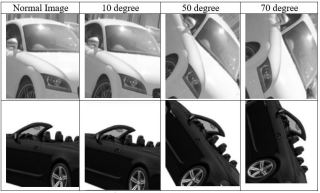

- You can add a rotation range in your ImageDataGenerator class by simply adding : 

        rotation_range=A_Value_From_0_To_360


**2. Random Shifts**

- ImageDataGenerator class has the argument height_shift_range for a vertical shift of image and width_shift_range for a horizontal shift of image. 

- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally

- You can add a width_shft or height_shift in your class by simply adding :  

        width_shift_range=A_Value_From_0_To_1, # horizontal shift
        height_shift_range=A_Value_From_0_To_1, # vertical shift

**3. Random Flips**

- Flipping images is also a great augmentation technique and it makes sense to use it with a lot of different objects.

- ImageDataGenerator class has parameters horizontal_flip and vertical_flip  for flipping along the vertical or the horizontal axis. However, this technique should be according to the object in the image. 


- You can add a horizontal_flip or vertical_flip in your class by simply adding:  

         horizontal_flip=True, # horizontal flip
         vertical_flip=True, # vertical flip

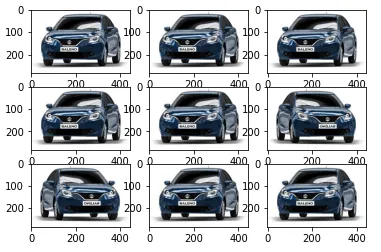

**4. Random Brightness**

- It randomly changes the brightness of the image. It is also a very useful augmentation technique because most of the time our object will not be under perfect lighting condition. So, it becomes imperative to train our model on images under different lighting conditions.

- Brightness can be controlled in the ImageDataGenrator class through the brightness_range argument. It accepts a list of two float values and picks a brightness shift value from that range. Values less than 1.0 darkens the image, whereas values above 1.0 brighten the image.

 - You can add brightness_range to your class by simply adding : 

        brightness_range=[YOUR_RANGE]

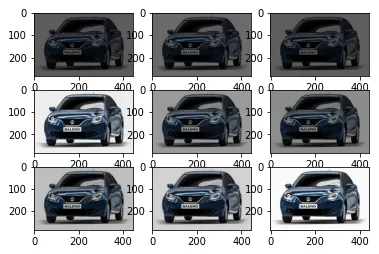

**5. Random Zoom**


- The zoom augmentation either randomly zooms in on the image or zooms out of the image.

- ImageDataGenerator class takes in a float value for zooming in the zoom_range argument. You could provide a list with two values specifying the lower and the upper limit. Else, if you specify a float value, then zoom will be done in the range [1-zoom_range,1+zoom_range].

- You can add zoom_range to your class by simply adding : 

        zoom_range=[YOUR_RANGE]

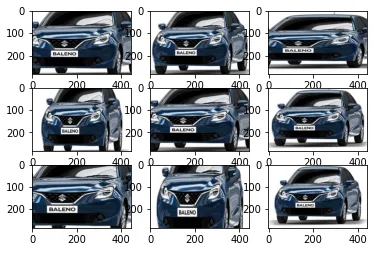

**6.Shear Intensity:**

- Shear Transformation is a process of slanting the image. It is different from the rotation because in rotation we will rotate the image but in shearing, we fix one axis and stretch the image in a certain angle known as the shearing angle. This is a sort of stretching which is not observed in rotation. The value of shear_range will be float which represents a Shear angle in a counter-clockwise direction in degrees.

- You can add shear_range in your class : 
        shear_range=YOUR_SHEAR_ANGLE

**7.Rescaling:**

- Rescale is a value by which we will multiply the data before any other processing. Our original images consist of RGB coefficients in the 0–255, but such values would be too high for our model to process (given a typical learning rate), so we target values between 0 and 1 instead of by scaling with a 1/255.

- You can add shear_range in your class :

        rescale=1./255

**ImageDataGenerator**

In [ ]:
#Define train and test datagen with ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=20.,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=[0.9, 1.25],
        brightness_range=[0.5, 1.5],
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

**Flow_from_directory**
- The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.

- The method expects that images belonging to different classes are present in different folders but are inside the same parent folder.

- The directory must be set to the path where your ‘n’ classes of folders are present.
- The **target_size** is the size of your input images, every image will be resized to this size.
- **color_mode**: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
- **batch_size**: No. of images to be yielded from the generator per batch.
- **class_mode**: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

In [ ]:
#Define train and test generator
train_generator=train_datagen.flow_from_directory(train_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)
validation_generator=test_datagen.flow_from_directory(test_dir,
class_mode="categorical",
target_size=input_shape,
batch_size=batch_size)